# NYC Taxi Fare Prediction

In [1]:
# load some default Python modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
get_ipython().run_line_magic('matplotlib', 'inline')
plt.style.use('seaborn-whitegrid')
plt.style.use('fivethirtyeight')
import urllib.request
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
# To remove un-necessary warnings
import warnings
warnings.filterwarnings("ignore")
print ("Libraries Imported Successfully")

Libraries Imported Successfully


In [3]:
datatype={"key":"object", "fare_amount":"float64", "pickup_datetime":"object", "pickup_longitude":"float64", "pickup_latitude":"float64","dropoff_longitude":"float64", "dropoff_latitude":"float64", "passenger_count":"int64"}

#read data in pandas dataframe
#train data

##df_raw = pd.read_csv("Desktop/new-york-city-taxi-fare-prediction/train.csv", low_memory=False, nrows=10000, dtype=datatype, parse_dates=["pickup_datetime"])
##df_raw = pd.read_csv("Desktop/new-york-city-taxi-fare-prediction/train.csv", low_memory=False, nrows=20000, dtype=datatype, parse_dates=["pickup_datetime"])
##df_raw = pd.read_csv("Desktop/new-york-city-taxi-fare-prediction/train.csv", low_memory=False, nrows=50000, dtype=datatype, parse_dates=["pickup_datetime"])

df_raw = pd.read_csv("Desktop/new-york-city-taxi-fare-prediction/train.csv", low_memory=False, nrows=10**5, dtype=datatype, parse_dates=["pickup_datetime"])

df_raw.drop(['key'],axis=1, inplace=True)

df_raw.head()


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


#### We have trained for 10k, 20k and 50k but in the above cell we have only executed and trained for 100k rows 

In [4]:
#Printing shape of Dataset
print("Shape of Dataset :", df_raw.shape)

Shape of Dataset : (100000, 7)


In [5]:
#Creating datetime features based on pickup datetime
import calendar
df_raw['pickup_date']= df_raw['pickup_datetime'].dt.date
df_raw['pickup_day']= df_raw['pickup_datetime'].apply(lambda x:x.day)
df_raw['pickup_hour']= df_raw['pickup_datetime'].apply(lambda x:x.hour)
df_raw['pickup_day_of_week']= df_raw['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
df_raw['pickup_month']= df_raw['pickup_datetime'].apply(lambda x:x.month)
df_raw['pickup_year']= df_raw['pickup_datetime'].apply(lambda x:x.year)
df_raw.head()


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010


In [6]:
#Describing Data
df_raw.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_month,pickup_year
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,11.354652,-72.494682,39.914481,-72.490967,39.919053,1.673820,15.664270,13.495110,6.261230,2011.74389
std,9.716777,10.693934,6.225686,10.471386,6.213427,1.300171,8.677631,6.507434,3.450569,1.86602
min,-44.900000,-736.550000,-74.007670,-84.654241,-74.006377,0.000000,1.000000,0.000000,1.000000,2009.00000
25%,6.000000,-73.992041,40.734996,-73.991215,40.734182,1.000000,8.000000,9.000000,3.000000,2010.00000
50%,8.500000,-73.981789,40.752765,-73.980000,40.753243,1.000000,16.000000,14.000000,6.000000,2012.00000
75%,12.500000,-73.966982,40.767258,-73.963433,40.768166,2.000000,23.000000,19.000000,9.000000,2013.00000
max,200.000000,40.787575,401.083332,40.851027,404.616667,6.000000,31.000000,23.000000,12.000000,2015.00000


In [6]:
#Remove 0 passenger count.
#The taxi fare initial charge is $2.5, so we are removing fare amount smaller than this amount. 


In [7]:
#Removing Outlier Value
df_raw = df_raw[((df_raw['pickup_longitude'] > -78) & 
                 (df_raw['pickup_longitude'] < -70)) & 
                ((df_raw['dropoff_longitude'] > -78) &
                 (df_raw['dropoff_longitude'] < -70)) & 
                ((df_raw['pickup_latitude'] > 37) &
                 (df_raw['pickup_latitude'] < 45)) & 
                ((df_raw['dropoff_latitude'] > 37) & 
                 (df_raw['dropoff_latitude'] < 45)) & 
                (df_raw['passenger_count'] > 0) & 
                (df_raw['fare_amount'] > 0)]

In [8]:
#Analyse change in data 
df_raw.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_month,pickup_year
count,97551.000000,97551.000000,97551.000000,97551.000000,97551.000000,97551.000000,97551.000000,97551.000000,97551.000000,97551.000000
mean,11.354004,-73.975141,40.751032,-73.974017,40.751465,1.680372,15.662884,13.492809,6.264088,2011.743334
std,9.698222,0.043751,0.036181,0.039903,0.037161,1.298527,8.677017,6.505541,3.451684,1.871197
min,0.010000,-75.425388,38.754215,-75.354559,39.296307,1.000000,1.000000,0.000000,1.000000,2009.000000
25%,6.000000,-73.992266,40.736641,-73.991395,40.735762,1.000000,8.000000,9.000000,3.000000,2010.000000
50%,8.500000,-73.982076,40.753531,-73.980437,40.753962,1.000000,16.000000,14.000000,6.000000,2012.000000
75%,12.500000,-73.968287,40.767679,-73.965127,40.768477,2.000000,23.000000,19.000000,9.000000,2013.000000
max,200.000000,-70.140793,43.183332,-72.854940,43.415190,6.000000,31.000000,23.000000,12.000000,2015.000000


In [9]:
#Checking for Nan Values
df_raw.isnull().sum()

fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count       0
pickup_date           0
pickup_day            0
pickup_hour           0
pickup_day_of_week    0
pickup_month          0
pickup_year           0
dtype: int64

In [10]:
#Remove duplicates
df_raw = df_raw.drop_duplicates()

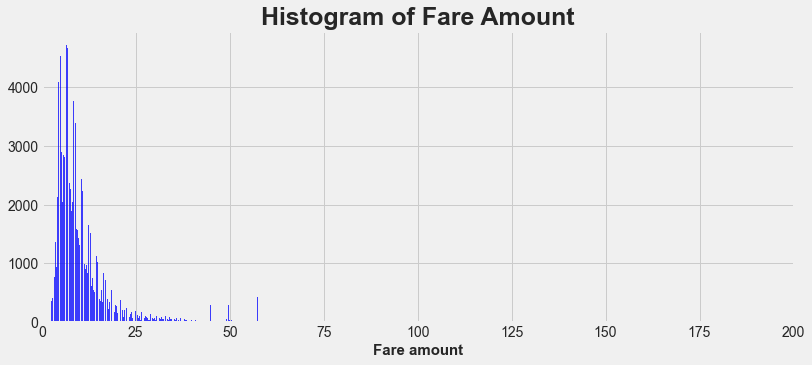

In [11]:
#Visualising Target Variable
plt.figure(figsize=(12, 5))
n, bins, patches = plt.hist (df_raw.fare_amount, 1000, facecolor='blue', alpha=0.75)
plt.xlabel('Fare amount', fontsize=15, fontweight='bold')
plt.title('Histogram of Fare Amount', fontsize=25, fontweight='bold')
plt.xlim(0,200)
plt.show();

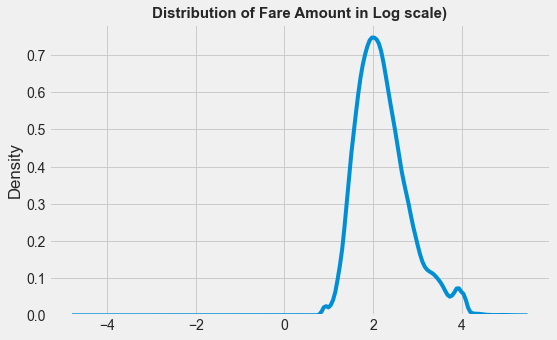

In [12]:
plt.figure(figsize=(8,5))
sns.kdeplot(np.log(df_raw['fare_amount'].values)).set_title(
"Distribution of Fare Amount in Log scale)", fontsize=15,fontweight='bold');

In [13]:
#Analysing Top 5 Fare Amount
df_raw['fare_amount'].value_counts(normalize=True).iloc[:5]

6.5    0.048077
4.5    0.041630
8.5    0.038329
5.3    0.029267
5.7    0.028795
Name: fare_amount, dtype: float64

Text(0, 0.5, 'Count')

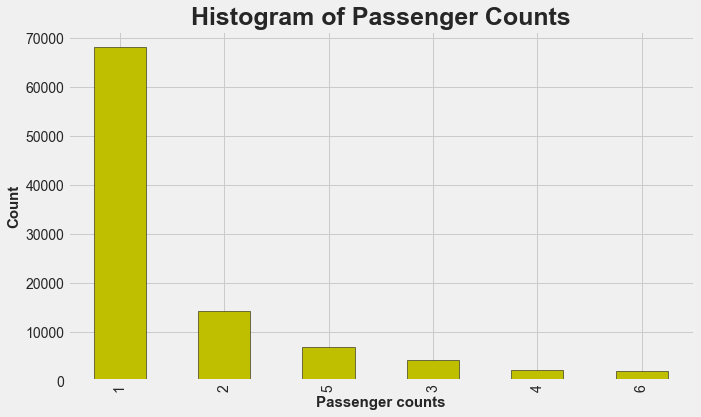

In [14]:
#Passenger count
plt.figure(figsize=(10,6))
df_raw['passenger_count'].value_counts().plot.bar(color = 'y', edgecolor = 'k');
plt.title('Histogram of Passenger Counts', fontsize=25, fontweight='bold')
plt.xlabel('Passenger counts', fontsize=15, fontweight='bold')
plt.ylabel('Count', fontsize=15, fontweight='bold')


Text(0, 0.5, 'Count')

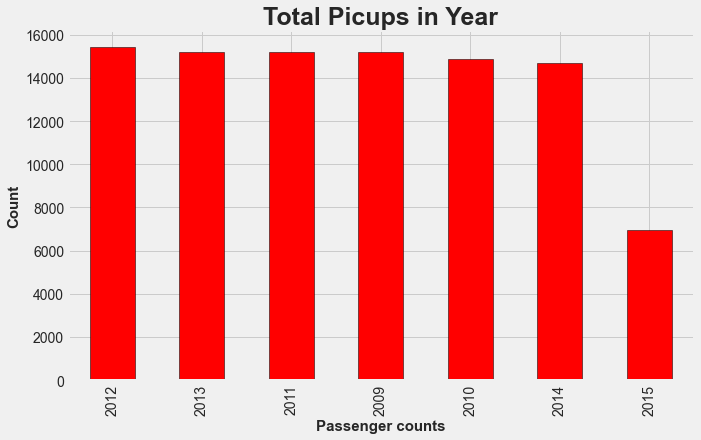

In [15]:
plt.figure(figsize= (10,6))
df_raw['pickup_year'].value_counts().plot.bar(color = 'r', edgecolor = 'k');
plt.title('Total Picups in Year', fontsize=25, fontweight='bold')
plt.xlabel('Passenger counts', fontsize=15, fontweight='bold')
plt.ylabel('Count', fontsize=15, fontweight='bold')


Text(0, 0.5, 'Count')

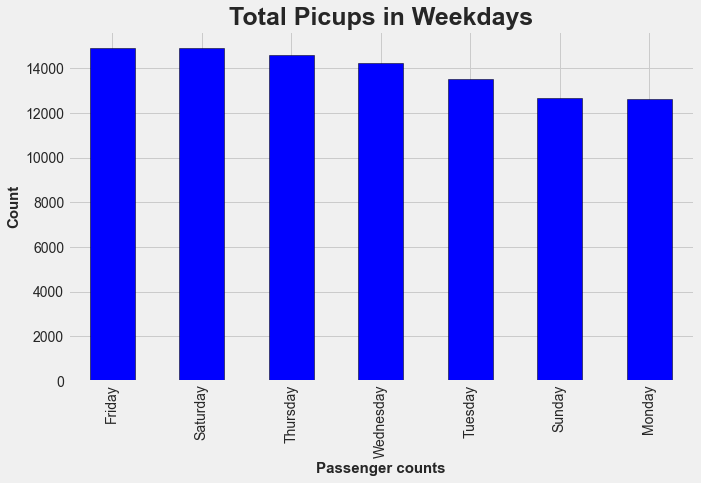

In [16]:
plt.figure(figsize=(10,6))
df_raw['pickup_day_of_week'].value_counts().plot.bar(color = 'b', edgecolor = 'k');
plt.title('Total Picups in Weekdays', fontsize=25, fontweight='bold')
plt.xlabel('Passenger counts', fontsize=15, fontweight='bold')
plt.ylabel('Count', fontsize=15, fontweight='bold')

In [17]:
#Analysing Number of Passengers
df_raw['passenger_count'].value_counts()

1    68122
2    14293
5     6876
3     4214
4     2042
6     2004
Name: passenger_count, dtype: int64

(-74.03, -73.75)

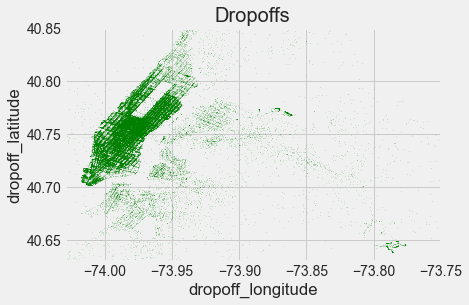

In [18]:
#PLot Heatmap of Pickups and Dropoffs within New York
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
df_raw.plot(kind='scatter', x='dropoff_longitude', y='dropoff_latitude', color='green', s=.02, alpha=.6)
plt.title("Dropoffs")
plt.ylim(city_lat_border)
plt.xlim(city_long_border)

(-74.03, -73.75)

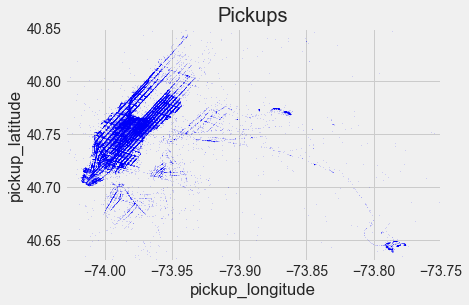

In [19]:
df_raw.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude', color='blue', s=.02, alpha=.6)
plt.title("Pickups")
plt.ylim(city_lat_border)
plt.xlim(city_long_border)

In [20]:
def distance (lat1, lon1, lat2, lon2):
    p = 0.017453292519943295 # Pi/180 
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos (lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

# add new column to dataframe with distance in miles
df_raw['distance_miles'] = distance(df_raw.pickup_latitude, df_raw.pickup_longitude, \
                                    df_raw.dropoff_latitude, df_raw.dropoff_longitude)

df_raw.head()


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,distance_miles
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009,0.640487
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010,5.250670
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011,0.863411
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012,1.739386
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010,1.242218


In [21]:
df_raw = df_raw[((df_raw['distance_miles'] < 67))]

In [22]:
df_raw.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_month,pickup_year,distance_miles
count,97530.000000,97530.000000,97530.000000,97530.000000,97530.000000,97530.000000,97530.000000,97530.000000,97530.000000,97530.000000,97530.000000
mean,11.352342,-73.975109,40.751134,-73.974029,40.751538,1.680447,15.662914,13.492669,6.264534,2011.743453,2.078213
std,9.695952,0.040760,0.032984,0.039791,0.035969,1.298559,8.676811,6.505811,3.451709,1.871334,2.394096
min,0.010000,-75.414728,39.605743,-75.354559,39.604972,1.000000,1.000000,0.000000,1.000000,2009.000000,0.000000
25%,6.000000,-73.992265,40.736652,-73.991397,40.735763,1.000000,8.000000,9.000000,3.000000,2010.000000,0.779898
50%,8.500000,-73.982076,40.753534,-73.980438,40.753963,1.000000,16.000000,14.000000,6.000000,2012.000000,1.340708
75%,12.500000,-73.968288,40.767679,-73.965132,40.768478,2.000000,23.000000,19.000000,9.000000,2013.000000,2.440520
max,200.000000,-72.856968,43.098708,-72.854940,43.415190,6.000000,31.000000,23.000000,12.000000,2015.000000,64.644331


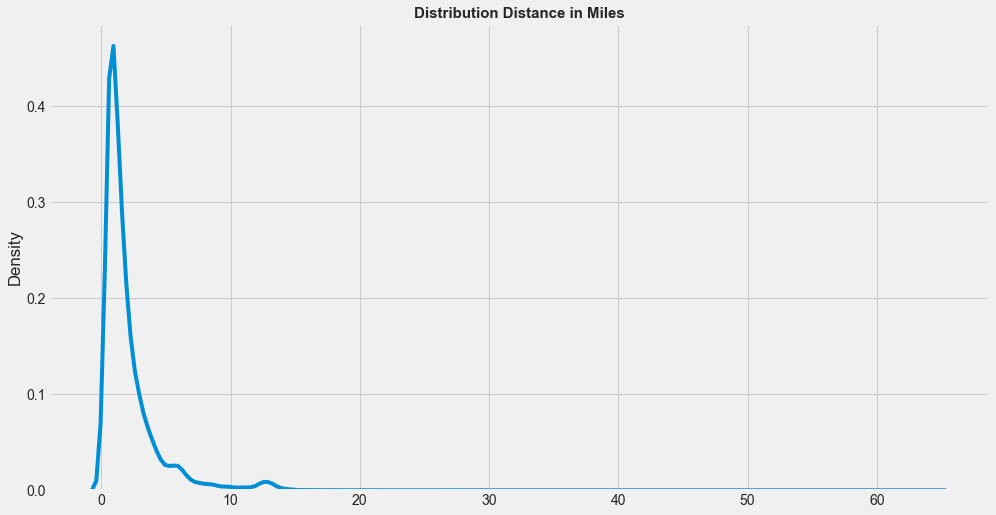

In [23]:
plt.figure(figsize=(15,8))
sns.kdeplot(df_raw['distance_miles'].values).set_title("Distribution Distance in Miles", 
                                                        fontsize=15, fontweight= 'bold');


In [24]:
import folium
Pickup_Locations = folium.Map(location=[40.767937,-73.982155],tiles='OpenStreetMap', zoom_start=12)
for each in df_raw[:500].iterrows():
    folium.CircleMarker([each[1]['pickup_latitude'],each[1]['pickup_longitude']], radius=3,
                        color='blue',
                        popup=str(each[1]['pickup_latitude'])+','+str(each[1]['pickup_longitude']),
                        fill_color=' #FD8A6C').add_to (Pickup_Locations)
Pickup_Locations

In [25]:
import folium
Pickup_Locations = folium.Map(location=[40.767937,-73.982155],tiles='OpenStreetMap', zoom_start=12)
for each in df_raw[:500].iterrows():
    folium.CircleMarker([each[1]['dropoff_latitude'],each[1]['dropoff_longitude']], radius=3,
                        color='red',
                        popup=str(each[1]['dropoff_latitude'])+','+str(each[1]['dropoff_longitude']),
                        fill_color=' #FD8A6C').add_to (Pickup_Locations)
Pickup_Locations


In [26]:
df_final=df_raw.copy()
df_final.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,distance_miles
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,15,17,Monday,6,2009,0.640487
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,5,16,Tuesday,1,2010,5.250670
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,18,0,Thursday,8,2011,0.863411
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,21,4,Saturday,4,2012,1.739386
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,9,7,Tuesday,3,2010,1.242218


In [27]:
#Imputing Categorical Variables
Variables={'Monday': 1, 'Tuesday': 2, 'Thursday': 3, 'Saturday': 4,
          'Wednesday': 5, 'Sunday': 6, 'Friday': 7}
year={2012: 1, 2013: 2, 2011: 3, 2009: 4, 2010: 5, 2014: 6, 2015: 7}
df_final['pickup_year']=df_final['pickup_year'].map(year)
df_final['pickup_day_of_week']=df_final['pickup_day_of_week'].map(Variables)
#df_final.drop(['pickup_datetime', 'pickup_date'], axis=1, inplace=True)
#df_final.head()

In [28]:
df = df_final.drop(['pickup_datetime' , 'pickup_date'], axis = 1)

In [29]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,distance_miles
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,4,0.640487
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,5,5.250670
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,0,3,8,3,0.863411
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,4,4,1,1.739386
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,5,1.242218
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,9.0,-73.947977,40.784792,-73.964262,40.792347,5,24,7,2,9,2,0.999114
99996,6.0,-73.962918,40.799107,-73.974178,40.786487,1,15,12,3,5,6,1.052250
99997,5.0,-73.996773,40.723549,-73.991974,40.724724,1,19,17,3,2,7,0.264072
99998,6.9,-73.983652,40.756667,-73.982715,40.767067,4,10,23,4,10,4,0.720242


#### For partial features we can use this code

features = ['passenger_count','hour','year','day','month','distance']

for f in features:
    related = df_train.fare_amount.corr(df_train[f])
    print("%s: %f" % (f,related))

final_features =['year','hour','month','distance','passenger_count']

In [30]:
# Building KNN model
from sklearn.model_selection import train_test_split
X=df.drop(['fare_amount'],axis=1)
y=df[['fare_amount']]

In [31]:
X.shape, y.shape
X=pd.DataFrame(X)
X.columns

Y=pd.DataFrame(y)

In [32]:
print(X.shape, Y.shape)

(97530, 11) (97530, 1)


In [33]:
# Splitting data set into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [34]:
from sklearn.preprocessing import MinMaxScaler

# scale data
X_train=pd.DataFrame(MinMaxScaler().fit_transform(X_train),\
                        columns=X_train.columns,index=X_train.index)
X_test=pd.DataFrame(MinMaxScaler().fit_transform(X_test),\
                        columns=X_test.columns,index=X_test.index)

## Random Forest 

In [ ]:
######RF#######
X=df.drop(['fare_amount'],axis=1)
y=df[['fare_amount']]
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=42)

In [ ]:
print ("Shape of X_train : ", X_train.shape)
print ("Shape of X_test : ", X_test.shape)
print ("Shape of y_train : ", y_train.shape)
print ("Shape of y_test :", y_test.shape)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rf = RandomForestRegressor(max_depth=5, random_state=0, n_estimators=200)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(mean_squared_error(y_test, y_pred)**0.5)

## The Mean Squared Error is 4.582425286613781

In [ ]:
import pickle
#Save the trained model as a pickle string.
pickle.dump(rf, open('rf','wb' ) )

In [ ]:
import folium
Enter_Coordinates = folium.Map(location=[40.767937, -73.982155],tiles='OpenStreetMap', zoom_start=12)
popup = folium.LatLngPopup()
popup=folium.ClickForMarker()

#folium.LatLngPopup().add_to(Enter_Coordinates)
Enter_Coordinates.add_child(popup)

Enter_Coordinates

In [ ]:
Pickup_Finder = folium.Map(location=[40.767937, -73.982155 ],tiles='OpenStreetMap', zoom_start=12)

Pickup=[40.744075,-74.003197]
Drop_off=[40.7616, -73.9734]

points = []
for i in range(len(Pickup)):
    points.append ([Pickup[i], Drop_off[i]])
    
print ("Distance Between Pickup and Drop-off in Miles : ", distance(Pickup[0], Pickup[1], Drop_off[0],Drop_off[1]) )

folium.CircleMarker(Pickup, radius=5, color='blue', popup=str([Pickup[0], Pickup[1]]),
                    fill_color='#FD8A6C').add_to(Pickup_Finder)

folium.CircleMarker(Drop_off, radius=5, color='red', popup=str([Drop_off[0],Drop_off[1]]),
                     fill_color='#FD8A6C').add_to(Pickup_Finder)

for index, lat in enumerate(Pickup):
    folium.Marker([lat,
                Drop_off[index]],
               icon = folium.Icon(color='green', icon='plus')).add_to(Pickup_Finder)

folium.PolyLine([Pickup, Drop_off], color="green", weight=3, opacity=5).add_to(Pickup_Finder)

Pickup_Finder


In [ ]:
print ('Enter Your Information to Predict Fare : ')

Pickup_Coordinates=str(input("Enter Pickup Coordinates : "))
Drop_Off_Coordinates=str(input("Enter Drop-off Coordinates : "))

pickup_latitude = float(Pickup_Coordinates.split(',')[0])
pickup_longitude = float(Pickup_Coordinates.split(',')[1])

dropoff_latitude = float(Drop_Off_Coordinates.split(',')[0])
dropoff_longitude = float(Drop_Off_Coordinates.split(',')[1])

Enter_Date=input("Enter Date (DD/MM/YEAR)")

passenger_count = int(input('Enter Number of Passengers: '))

pickup_day = int(Enter_Date.split('/')[0])
pickup_hour = int(input('Enter Hour: '))

pickup_day_of_week = int(input('Enter Week: '))

pickup_month = int(Enter_Date.split('/')[1])

pickup_year = int(Enter_Date.split('/')[2])

distance_miles=distance(pickup_latitude,pickup_longitude,dropoff_latitude, dropoff_longitude)

my_array = np.array([pickup_longitude, pickup_latitude, dropoff_longitude,
                     dropoff_latitude, passenger_count, pickup_day, pickup_hour,
                     pickup_day_of_week, pickup_month, pickup_year, distance_miles])

print ('Fare Amount ($) : ',rf.predict(my_array.reshape(1,-1)))


In [ ]:
import tkinter as tk
from tkinter import ttk
import tkinter.filedialog
from tkinter import *
from tkinter.scrolledtext import *

window=tk.Tk()
window.title ("New York Taxi Prediction By Group E")
window.geometry('400x350')

#coLumn1
l1=Label(window, text="Pickup_coordinates",padx=5, pady=5)
l1.grid(row=3, column=2)
pickup_value = StringVar()
entry = Entry(window, textvariable=pickup_value)
entry.grid(row=3, column=3)

l2=Label(window, text="Dropoff_coordinates", padx=5, pady=5)
l2.grid(row=4, column=2)
dropoff_value = StringVar()
entry2 = Entry(window, textvariable=dropoff_value)
entry2.grid(row=4, column=3)

l3=Label(window, text="Enter Date",padx=5, pady=5)
l3.grid(row=5, column=2)
date_value = StringVar()
entry3 = Entry(window, textvariable=date_value)
entry3.grid(row=5, column=3)

l4=Label(window, text="No. of passengers", padx=5, pady=5)
l4.grid(row=6, column=2)
passengers_value = StringVar()
entry4 = Entry(window, textvariable=passengers_value)
entry4.grid(row=6, column=3)

l5=Label(window, text="Enter Hour", padx=5, pady=5)
l5.grid(row=7, column=2)
hour_value = StringVar()
entry5 = Entry(window, textvariable=hour_value)
entry5.grid(row=7, column=3)

l6=Label(window, text="Enter Week", padx=5, pady=5)
l6.grid(row=8, column=2)
week_value = StringVar()
entry6 = Entry(window, textvariable=week_value)
entry6.grid(row=8, column=3)

import pandas as pd
data=pd.DataFrame()
def action():
    global db
    import pandas as pd
    data=pd.DataFrame(columns=['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude',
                               'passenger_count','pickup_day','pickup_hour','pickup_day_of_week','pickup_month',
                               'pickup_year','distance_miles'])
    
    p=pickup_value.get()
    p=p.split(',')[0]
    p=float(p)
    data.loc[0,'pickup_latitude']=p
              
    p1=pickup_value.get()
    p1=p1.split(',')[0]
    p1=float(p1)
    data.loc[0,'pickup_longitude']=p1
             
    l=dropoff_value.get()
    l=l.split(',')[0]
    l=float(l)
    data.loc[0,'dropoff_latitude']=l
              
    l1=dropoff_value.get()
    l1=l1.split(',')[1]
    l1=float (l1)
    data.loc[0,'dropoff_longitude']=l1
              
    pa=passengers_value.get()
    data.loc[0, 'passenger_count']=pa
              
    d=date_value.get()
    d=d.split('/')[0]
    data.loc[0,'pickup_day']=d
              
    h=hour_value.get()
    data.loc[0,'pickup_hour']=h
              
    w=week_value.get()
    data.loc[0, 'pickup_day_of_week']=w
              
    m=date_value.get()
    m=m.split('/')[1]
    data.loc[0, 'pickup_month']=m
              
    y=date_value.get()
    y=y.split('/')[2]
    data.loc[0, 'pickup_year']=y
              
    import numpy as np
    def distance(lat1, lon1, lat2, lon2):
              p = 0.017453292519943295 #Pi/180
              a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2 
              return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))
    
    dis=distance(p,p1,l,l1)
    data.loc[0, 'distance_miles']=dis
    db=data

    import pickle
    infile = open ("rf", 'rb')
    new = pickle.load (infile, encoding = 'bytes')
    prediction=new.predict(db)
    prediction=str("$ {}".format (prediction))
    Predict_entrybox.insert(tk.END,prediction)
              
button1=Button(window, text="Fare Price",command=action,bg="Black",fg="white")
button1.config(font=("Times", 15, "bold"))
button1.grid(row=20, column=2, padx=20, pady=20)
Predict_entrybox=Entry(window,width=20)
Predict_entrybox.grid (row=20, column=3)

def clear_all() :
              entry.delete(0, ENO)
              entry2.delete(0, END)
              entry3.delete(0, END)
              entry4.delete(0, END)
              entry5.delete(0, END)
              entry6.delete(0, END)
              Predict_entrybox.delete(0, END)
              
button2=Button(window, text="Clear Results", command=clear_all,bg="Black",fg="white")
button2.config(font=("Times", 15, "bold"))
button2.grid(row=21, column=2)
              
window.mainloop()

## KNN

In [69]:
def gridSearch(X, y):

    knnReg = KNeighborsRegressor()
    parameters = {'n_neighbors': np.arange(1, 100)}
    gsKnn = GridSearchCV(knnReg, parameters, return_train_score = True, cv = None)
    gsKnn.fit(X, y)
    print(gsKnn.best_params_)


In [70]:
def cvs(X, y):

    for k in range(1, 100):
        knnCv = KNeighborsRegressor(k)
        cvScore = cross_val_score(knnCv, X, y, cv = None)
        print("CV score {} for K-value {}".format(cvScore, k))

In [71]:
mse = []
kvalue=[]

def mvk(X_train, y_train, X_test, y_test):

    
    for k in range(1, 100):
        knn_mse = KNeighborsRegressor(k)
        knn_mse.fit(X_train, y_train)
        y_pred = knn_mse.predict(X_test)
        accuracy = knn_mse.score(X_test, y_test)
        print("accuracy is {} for k = {}".format(accuracy, k))
        mSe = mean_squared_error(y_test, y_pred)
        print("The Mse for k = {} is {}".format(k, mSe))
        rSquare = r2_score(y_test, y_pred)
        print("The R2 Score for k = {} is {}".format(k, rSquare))
        mse.append(mSe)
        kvalue.append(k)
    best_mse_index = mse.index(min(mse))
    best_k = kvalue[best_mse_index]
    plt.xlabel("K value")
    plt.ylabel("Mse")
    plt.plot(kvalue, mse)
    return best_k

In [72]:
def normalize(df):
    normalizedDf = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        normalizedDf[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return normalizedDf

X_trainNormalized = normalize(X_train)
X_testNormalized = normalize(X_test)

{'n_neighbors': 13}
CV score [ 0.02274014 -0.02598193 -0.05730493 -0.00445322 -0.02731663] for K-value 1
CV score [0.10620268 0.10383154 0.09133749 0.10433593 0.09072773] for K-value 2
CV score [0.14590418 0.12261709 0.12403605 0.13728453 0.13481728] for K-value 3
CV score [0.16032956 0.13532899 0.13955885 0.1443897  0.14634913] for K-value 4
CV score [0.16985014 0.14550155 0.15628905 0.15820723 0.15260291] for K-value 5
CV score [0.17496255 0.15301566 0.1634191  0.16182897 0.16305604] for K-value 6
CV score [0.17968643 0.15810606 0.16559051 0.17067334 0.16633436] for K-value 7
CV score [0.18234326 0.16509476 0.16925805 0.17420574 0.16948765] for K-value 8
CV score [0.18483793 0.16517509 0.16928841 0.17061814 0.17130447] for K-value 9
CV score [0.1868274  0.16722392 0.16813632 0.17212715 0.17438676] for K-value 10
CV score [0.18478283 0.16997159 0.16923362 0.16979604 0.1752482 ] for K-value 11
CV score [0.18792681 0.17112985 0.1669686  0.17065456 0.17439572] for K-value 12
CV score [0.

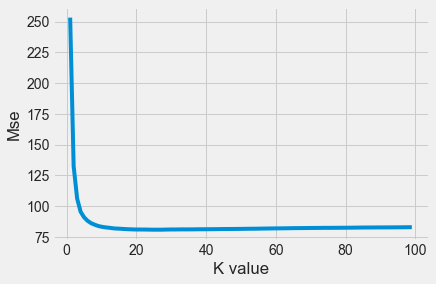

In [73]:
gridSearch(X_trainNormalized, y_train)
cvs(X_trainNormalized, y_train)
best_kvalue = mvk(X_trainNormalized, y_train, X_testNormalized, y_test)
print("The best k value is {}".format(best_kvalue))

In [74]:
knn = KNeighborsRegressor(best_kvalue)
knn.fit(X_trainNormalized, y_train)
y_pred = knn.predict(X_testNormalized)
mSe = mean_squared_error(y_test, y_pred)
print("The Mse for k = {} is {}".format(best_kvalue, mSe))
rSquare = r2_score(y_test, y_pred)
print("The R2 Score for k = {} is {}".format(best_kvalue, rSquare))

The Mse for k = 26 is 80.93439546078069
The R2 Score for k = 26 is 0.10896627672970649


#### I trained the data for 10,000, 20,000, and 50,000 rows for some features and discovered that when the value of the rows increases, the value for the best k increases, the model's accuracy increases, and the MSE reduces.

#### However, when I evaluated all of the features with 100,000 rows, the MSE increased and the accuracy decreased.

### SVM

In [40]:
######SVM######
#reg_parameters = [0.0001,0.001,0.01,]
reg_parameters = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

In [41]:
def s_vec(c, x, y, xt, yt, kr, deg):
    if kr == "linear":
        svm = SVR(C=c, kernel=kr)
    elif kr == "rbf":
        svm = SVR(C=c, kernel=kr)
    elif kr == "poly" and deg == 3:
        svm = SVR(C=c, kernel=kr)
    elif kr == "poly" and deg == 5:
        svm = SVR(C=c, kernel=kr)
    elif kr == "poly" and deg == 10:
        svm = SVR(C=c, kernel=kr, degree=deg)
    else:
        print("Choose the right kernel")

    model_svm = svm.fit(x, y)
    y_pred = model_svm.predict(xt)

    mse = mean_squared_error(yt,y_pred)

    return y_pred, svm, mse

In [42]:
# Executing SVM with linear kernel

for c in reg_parameters:
    print("Executing SVM Linear Kernel of predicted probabilities for C value {}".format(c))
    y_pred, reg_fit, mse = s_vec(c, X_train, y_train, X_test, y_test, "linear",3)
    print("The Mean Square Error is {}".format(mse))

Executing SVM Linear Kernel of predicted probabilities for C value 0.0001
The Mean Square Error is 35.96915769662812
Executing SVM Linear Kernel of predicted probabilities for C value 0.001
The Mean Square Error is 35.99865832393369
Executing SVM Linear Kernel of predicted probabilities for C value 0.01
The Mean Square Error is 36.035535320753596
Executing SVM Linear Kernel of predicted probabilities for C value 0.1
The Mean Square Error is 35.75635518807169
Executing SVM Linear Kernel of predicted probabilities for C value 1
The Mean Square Error is 35.67511916142341
Executing SVM Linear Kernel of predicted probabilities for C value 10
The Mean Square Error is 35.42111021181205
Executing SVM Linear Kernel of predicted probabilities for C value 100
The Mean Square Error is 35.36767858450214


In [43]:
# Executing SVM with RBF kernel

for c in reg_parameters:
    print("Executing SVM RBF Kernel of predicted probabilities for C value {}".format(c))
    y_pred, reg_fit, mse = s_vec(c, X_train, y_train, X_test, y_test, "rbf", "3")
    print("The Mean Square Error is {}".format(mse))


Executing SVM RBF Kernel of predicted probabilities for C value 0.0001
The Mean Square Error is 101.01109312753007
Executing SVM RBF Kernel of predicted probabilities for C value 0.001
The Mean Square Error is 100.57749780936054
Executing SVM RBF Kernel of predicted probabilities for C value 0.01
The Mean Square Error is 96.33418183707354
Executing SVM RBF Kernel of predicted probabilities for C value 0.1
The Mean Square Error is 64.44778364049165
Executing SVM RBF Kernel of predicted probabilities for C value 1
The Mean Square Error is 33.132184293651136
Executing SVM RBF Kernel of predicted probabilities for C value 10
The Mean Square Error is 32.47145899781716
Executing SVM RBF Kernel of predicted probabilities for C value 100
The Mean Square Error is 30.87576058107202


In [44]:
# Executing SVM with Poly kernel and degree 3

for c in reg_parameters:
    print("Executing SVM Poly Kernel with degree 3 of predicted probabilities for C value {}".format(c))
    y_pred, reg_fit, mse = s_vec(c, X_train, y_train, X_test, y_test, "poly", 3)
    print("The Mean Square Error is {}".format(mse))


Executing SVM Poly Kernel with degree 3 of predicted probabilities for C value 0.0001
The Mean Square Error is 100.98643285536393
Executing SVM Poly Kernel with degree 3 of predicted probabilities for C value 0.001
The Mean Square Error is 100.33171059124378
Executing SVM Poly Kernel with degree 3 of predicted probabilities for C value 0.01
The Mean Square Error is 94.04640347799821
Executing SVM Poly Kernel with degree 3 of predicted probabilities for C value 0.1
The Mean Square Error is 53.70604131600843
Executing SVM Poly Kernel with degree 3 of predicted probabilities for C value 1
The Mean Square Error is 35.79786523035641
Executing SVM Poly Kernel with degree 3 of predicted probabilities for C value 10
The Mean Square Error is 35.20612860029443
Executing SVM Poly Kernel with degree 3 of predicted probabilities for C value 100
The Mean Square Error is 30.98763728934716


In [45]:
# Executing SVM with Poly kernel and degree 5

for c in reg_parameters:
    print("Executing SVM poly kernel with degree 5 of predicted probabilities for C value {}".format(c))
    y_pred, reg_fit, mse = s_vec(c, X_train, y_train, X_test, y_test, "poly", 5)
    print("The Mean Square Error is {}".format(mse))


Executing SVM poly kernel with degree 5 of predicted probabilities for C value 0.0001
The Mean Square Error is 100.98643285536393
Executing SVM poly kernel with degree 5 of predicted probabilities for C value 0.001
The Mean Square Error is 100.33171059124378
Executing SVM poly kernel with degree 5 of predicted probabilities for C value 0.01
The Mean Square Error is 94.04640347799821
Executing SVM poly kernel with degree 5 of predicted probabilities for C value 0.1
The Mean Square Error is 53.70604131600843
Executing SVM poly kernel with degree 5 of predicted probabilities for C value 1
The Mean Square Error is 35.79786523035641
Executing SVM poly kernel with degree 5 of predicted probabilities for C value 10
The Mean Square Error is 35.20612860029443
Executing SVM poly kernel with degree 5 of predicted probabilities for C value 100
The Mean Square Error is 30.98763728934716


In [46]:
# Executing SVM with Poly kernel and degree 10

for c in reg_parameters:
    print("Executing SVM poly kernel with degree 10 of predicted probabilities for C value {}".format(c))
    y_pred, reg_fit, mse = s_vec(c, X_train, y_train, X_test, y_test, "poly", 10)
    print("The Mean Square Error is {}".format(mse))


Executing SVM poly kernel with degree 10 of predicted probabilities for C value 0.0001
The Mean Square Error is 100.82626715176804
Executing SVM poly kernel with degree 10 of predicted probabilities for C value 0.001
The Mean Square Error is 98.74956601953568
Executing SVM poly kernel with degree 10 of predicted probabilities for C value 0.01
The Mean Square Error is 80.78161491523176
Executing SVM poly kernel with degree 10 of predicted probabilities for C value 0.1
The Mean Square Error is 38.11516951736433
Executing SVM poly kernel with degree 10 of predicted probabilities for C value 1
The Mean Square Error is 33.64367165878518
Executing SVM poly kernel with degree 10 of predicted probabilities for C value 10
The Mean Square Error is 26.892893001314416
Executing SVM poly kernel with degree 10 of predicted probabilities for C value 100
The Mean Square Error is 26.09387692180343


#### The MSE was around 28.68 for rows 10,000, 20,000, and 50,000, but it jumped to 65 when we incorporated all the characteristics and rows 100,000.


### Neural Network ###

In [47]:
#######NN######

# Computing the neural network

def neural_net(c, x, y, xt, yt, layers):

    if layers == "3":
        nn = MLPRegressor(hidden_layer_sizes=(128, 128, 64), alpha=c)
    elif layers == "4":
        nn = MLPRegressor(hidden_layer_sizes=(128, 128, 64, 32), alpha=c)
    else:
        print(" You cannot choose more than 4 layers for this exercize")

    model_nn = nn.fit(x, y)
    y_pred = model_nn.predict(xt)
    mse = mean_squared_error(yt,y_pred)

    return y_pred, nn, mse

In [48]:
# Executing Neural Networks 3 layers

for c in reg_parameters:
    print("Executing Neural Networks of predicted probabilities for C value {}".format(c))
    y_pred, nnn, sq_error = neural_net(c, X_train, y_train, X_test, y_test, "3")
    print("The Mean Square Error is {} for c = {}".format(sq_error, c))


Executing Neural Networks of predicted probabilities for C value 0.0001
The Mean Square Error is 22.374702472409773 for c = 0.0001
Executing Neural Networks of predicted probabilities for C value 0.001
The Mean Square Error is 22.838266256237926 for c = 0.001
Executing Neural Networks of predicted probabilities for C value 0.01
The Mean Square Error is 22.12707743227068 for c = 0.01
Executing Neural Networks of predicted probabilities for C value 0.1
The Mean Square Error is 22.241230925400544 for c = 0.1
Executing Neural Networks of predicted probabilities for C value 1
The Mean Square Error is 24.08265990072336 for c = 1
Executing Neural Networks of predicted probabilities for C value 10
The Mean Square Error is 24.44671360732079 for c = 10
Executing Neural Networks of predicted probabilities for C value 100
The Mean Square Error is 26.23027709575815 for c = 100


In [49]:
# Executing Neural Networks 4 layers

for c in reg_parameters:
    print("Executing Neural Networks of predicted probabilities for C value {}".format(c))
    y_pred, nnn, sq_error = neural_net(c, X_train, y_train, X_test, y_test, "4")
    print("The Mean Square Error is {} for c = {}".format(sq_error, c))


Executing Neural Networks of predicted probabilities for C value 0.0001
The Mean Square Error is 22.22580510609562 for c = 0.0001
Executing Neural Networks of predicted probabilities for C value 0.001
The Mean Square Error is 22.044479574696823 for c = 0.001
Executing Neural Networks of predicted probabilities for C value 0.01
The Mean Square Error is 23.284080017291387 for c = 0.01
Executing Neural Networks of predicted probabilities for C value 0.1
The Mean Square Error is 22.33717393844035 for c = 0.1
Executing Neural Networks of predicted probabilities for C value 1
The Mean Square Error is 23.048780499342694 for c = 1
Executing Neural Networks of predicted probabilities for C value 10
The Mean Square Error is 25.369499087502064 for c = 10
Executing Neural Networks of predicted probabilities for C value 100
The Mean Square Error is 25.88233368193701 for c = 100


#### For rows 10,000, 20,000, and 50,000, the MSE was around 28.68, but it jumped to 22.64 when we included all the features and rows 100,000.
#### As a result, feature changes have little impact on Neural Network.

### Linear Regression 

In [35]:
import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


In [36]:
from sklearn.model_selection import train_test_split
reg = LinearRegression()
sfs = SFS(reg, k_features = 'best', forward = True, floating = False, verbose = 0, cv = 5)
sfs = sfs.fit(X,y)

In [37]:
# Best feature at each step
sfs.subsets_

{1: {'feature_idx': (10,),
  'cv_scores': array([0.56811796, 0.66027893, 0.55309501, 0.69859998, 0.65499354]),
  'avg_score': 0.6270170841436877,
  'feature_names': ('distance_miles',)},
 2: {'feature_idx': (1, 10),
  'cv_scores': array([0.5838402 , 0.66853519, 0.56636899, 0.69527475, 0.65859156]),
  'avg_score': 0.6345221379266481,
  'feature_names': ('pickup_latitude', 'distance_miles')},
 3: {'feature_idx': (0, 1, 10),
  'cv_scores': array([0.57960483, 0.67644737, 0.57327268, 0.69938397, 0.66732188]),
  'avg_score': 0.6392061444700092,
  'feature_names': ('pickup_longitude', 'pickup_latitude', 'distance_miles')},
 4: {'feature_idx': (0, 1, 3, 10),
  'cv_scores': array([0.57818425, 0.67873037, 0.57612024, 0.70150923, 0.66867426]),
  'avg_score': 0.6406436704184543,
  'feature_names': ('pickup_longitude',
   'pickup_latitude',
   'dropoff_latitude',
   'distance_miles')},
 5: {'feature_idx': (0, 1, 2, 3, 10),
  'cv_scores': array([0.58159022, 0.67968664, 0.57909153, 0.70143682, 0.6718

In [38]:
# name of top features
sfs.k_feature_names_
sfs.k_score_

0.643946922395024

In [39]:
# wrapper method: backward selection
# estimator: LinearRegression
# cross-validation: 5-fold

sfs = SFS(reg, k_features = 'best', forward = False, floating = False, verbose = 0, cv = 5)
sfs = sfs.fit(X,y)

In [40]:
# Best feature at each step
sfs.subsets_

{11: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10),
  'cv_scores': array([0.58284231, 0.68102983, 0.58039563, 0.7024568 , 0.67292037]),
  'avg_score': 0.6439289874272769,
  'feature_names': ('pickup_longitude',
   'pickup_latitude',
   'dropoff_longitude',
   'dropoff_latitude',
   'passenger_count',
   'pickup_day',
   'pickup_hour',
   'pickup_day_of_week',
   'pickup_month',
   'pickup_year',
   'distance_miles')},
 10: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 8, 9, 10),
  'cv_scores': array([0.58283933, 0.6810273 , 0.58048336, 0.70245392, 0.6729307 ]),
  'avg_score': 0.643946922395024,
  'feature_names': ('pickup_longitude',
   'pickup_latitude',
   'dropoff_longitude',
   'dropoff_latitude',
   'passenger_count',
   'pickup_day',
   'pickup_hour',
   'pickup_month',
   'pickup_year',
   'distance_miles')},
 9: {'feature_idx': (0, 1, 2, 3, 4, 6, 8, 9, 10),
  'cv_scores': array([0.58283388, 0.68105158, 0.58047777, 0.70244286, 0.67292561]),
  'avg_score': 0.6439463398367555,
  'fea

In [41]:
# name of top features
sfs.k_feature_names_
sfs.k_score_

0.643946922395024

In [57]:
# Distance has the highest correlation with target with a coefficient of 0.802
# Based on the above analysis removing day as it is not correlated at all.

In [42]:
# Building Linear Regression model

X=df.drop(['fare_amount'],axis=1)
y=df[['fare_amount']]


In [43]:
X.shape, y.shape
reg = LinearRegression().fit(X,y)

In [44]:
# Splitting data set into train and test 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


In [45]:
reg = LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

In [46]:
print(reg.score(X_train,y_train))
print(reg.score(X_test,y_test))


0.635844115733691
0.6985262238657952


In [47]:
y_pred = reg.predict(X_test)
y_train_pred= reg.predict(X_train)


In [48]:
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
train_mse = mean_squared_error(y_train_pred, y_train)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_mse = mean_squared_error(y_test, y_pred)
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')
print(f'Train MSE: {train_mse:.4f}')
print(f'Test MSE: {test_mse:.4f}')


Train r2 score:  0.4272874824891364
Test r2 score:  0.6985262238657952
Train RMSE: 5.8627
Test RMSE: 5.2811
Train MSE: 34.3708
Test MSE: 27.8905


In [49]:
# USING K-FOLD CROSS VALIDATION on training dataset

scores = cross_val_score(reg, X_train, y_train, cv=6)
print ("Cross validated scores:", scores)

Cross validated scores: [0.6452109  0.65046877 0.66687251 0.59727295 0.64317488 0.58885659]


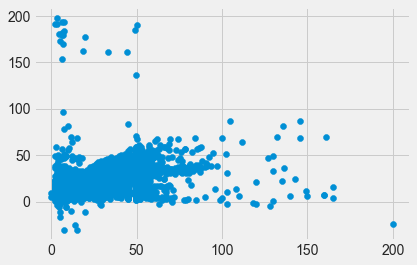

In [50]:
predictions = cross_val_predict(reg, X_train, y_train, cv=6)
plt.scatter(y_train, predictions)

In [51]:
accuracy = metrics.r2_score(y_train, predictions)
print ("Cross-Predicted Accuracy:", accuracy)


Cross-Predicted Accuracy: 0.6327990031644745


In [52]:
# Using Lasso regression

from sklearn.linear_model import Lasso

alphas =[0.001,0.01,0.1,0.4,1.0,5.0,10.0]  
best_mse=np.inf
best_r2=0

In [53]:
for alpha in alphas:
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_train, y_train)
    y_train_pred = lasso.predict(X_train)
    y_pred = lasso.predict(X_test)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
    mse_test = mean_squared_error(y_test, y_pred)
    r2_train= r2_score(y_train, y_train_pred)
    r2_test= r2_score(y_test, y_pred)
    print("Lasso - alpha : (%.3f) Train RMSE : (%.9f)" %(alpha,rmse_train))
    print("Lasso - alpha : (%.3f) Test  RMSE : (%.9f)" %(alpha,rmse_test))
    print("Lasso - alpha : (%.3f) Train r2 score   : (%.9f)" %(alpha,r2_train))
    print("Lasso - alpha : (%.3f) Test r2 score: (%.9f)" %(alpha,r2_test))
    if (rmse_test<best_mse):
        best_alpha_mse= alpha
        best_mse=rmse_test
        best_model_mse=lasso       
    if(r2_train>best_r2):
        best_alpha_r2= alpha
        best_r2=r2_train
        best_model_r2=lasso

Lasso - alpha : (0.001) Train RMSE : (5.862919119)
Lasso - alpha : (0.001) Test  RMSE : (5.275559213)
Lasso - alpha : (0.001) Train r2 score   : (0.635811634)
Lasso - alpha : (0.001) Test r2 score: (0.699163253)
Lasso - alpha : (0.010) Train RMSE : (5.888753674)
Lasso - alpha : (0.010) Test  RMSE : (5.247733565)
Lasso - alpha : (0.010) Train r2 score   : (0.632595020)
Lasso - alpha : (0.010) Test r2 score: (0.702328378)
Lasso - alpha : (0.100) Train RMSE : (6.024563997)
Lasso - alpha : (0.100) Test  RMSE : (5.299591687)
Lasso - alpha : (0.100) Train r2 score   : (0.615452930)
Lasso - alpha : (0.100) Test r2 score: (0.696416125)
Lasso - alpha : (0.400) Train RMSE : (6.031765494)
Lasso - alpha : (0.400) Test  RMSE : (5.331903781)
Lasso - alpha : (0.400) Train r2 score   : (0.614533039)
Lasso - alpha : (0.400) Test r2 score: (0.692702882)
Lasso - alpha : (1.000) Train RMSE : (6.046687689)
Lasso - alpha : (1.000) Test  RMSE : (5.392121114)
Lasso - alpha : (1.000) Train r2 score   : (0.6126

In [54]:
print(f"\nBest test RMSE:{best_mse:3.4f} \nBest alpha (RMSE):{best_alpha_mse:3.5f}")
print(f"\nBest train R2:{best_r2:3.4f} \nBest alpha (r2):{best_alpha_r2:3.5f}")
  


Best test RMSE:5.2477 
Best alpha (RMSE):0.01000

Best train R2:0.6358 
Best alpha (r2):0.00100


In [55]:
# Using L2 regularization
# Ridge Regression

from sklearn.linear_model import Ridge
alphas =[0.001,0.01,0.1,0.4,1.0,5.0,10.0]  
best_mse=np.inf
best_r2=0

In [56]:
for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train, y_train)
    y_train_pred = ridge.predict(X_train)
    y_pred = ridge.predict(X_test)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
    mse_test = mean_squared_error(y_test, y_pred)
    r2_train= r2_score(y_train, y_train_pred)
    r2_test= r2_score(y_test, y_pred)
    print("Ridge - alpha : (%.3f) Train RMSE : (%.9f)" %(alpha,rmse_train))
    print("Ridge - alpha : (%.3f) Test  RMSE : (%.9f)" %(alpha,rmse_test))
    print("Ridge - alpha : (%.3f) Train r2 score   : (%.9f)" %(alpha,r2_train))
    print("Ridge - alpha : (%.3f) Test r2 score: (%.9f)" %(alpha,r2_test))
    if (rmse_test<best_mse):
        best_alpha_mse= alpha
        best_mse=rmse_test
        best_model_mse=ridge       
    if(r2_train>best_r2):
        best_alpha_r2= alpha
        best_r2=r2_train
        best_model_r2=ridge

Ridge - alpha : (0.001) Train RMSE : (5.862657655)
Ridge - alpha : (0.001) Test  RMSE : (5.281140147)
Ridge - alpha : (0.001) Train r2 score   : (0.635844116)
Ridge - alpha : (0.001) Test r2 score: (0.698526415)
Ridge - alpha : (0.010) Train RMSE : (5.862657656)
Ridge - alpha : (0.010) Test  RMSE : (5.281125067)
Ridge - alpha : (0.010) Train r2 score   : (0.635844116)
Ridge - alpha : (0.010) Test r2 score: (0.698528137)
Ridge - alpha : (0.100) Train RMSE : (5.862657833)
Ridge - alpha : (0.100) Test  RMSE : (5.280974606)
Ridge - alpha : (0.100) Train r2 score   : (0.635844093)
Ridge - alpha : (0.100) Test r2 score: (0.698545315)
Ridge - alpha : (0.400) Train RMSE : (5.862660498)
Ridge - alpha : (0.400) Test  RMSE : (5.280477522)
Ridge - alpha : (0.400) Train r2 score   : (0.635843762)
Ridge - alpha : (0.400) Test r2 score: (0.698602062)
Ridge - alpha : (1.000) Train RMSE : (5.862675175)
Ridge - alpha : (1.000) Test  RMSE : (5.279503526)
Ridge - alpha : (1.000) Train r2 score   : (0.6358

In [57]:
print(f"\nBest test RMSE:{best_mse:3.4f} \nBest alpha (RMSE):{best_alpha_mse:3.5f}")
print(f"\nBest train R2:{best_r2:3.4f} \nBest alpha (r2):{best_alpha_r2:3.5f}")


Best test RMSE:5.2676 
Best alpha (RMSE):10.00000

Best train R2:0.6358 
Best alpha (r2):0.00100


In [74]:
# Scaling data

X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)


In [58]:
reg = LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

In [59]:
print(reg.score(X_train,y_train))
print(reg.score(X_test,y_test))


0.635844115733691
0.6985262238657952


In [60]:
y_pred = reg.predict(X_test)
y_train_pred= reg.predict(X_train)

In [61]:
print('Train r2 score: ', r2_score(y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
train_rmse = np.sqrt(mean_squared_error(y_train_pred, y_train))
train_mse = mean_squared_error(y_train_pred, y_train)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_mse = mean_squared_error(y_test, y_pred)
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')
print(f'Train MSE: {train_mse:.4f}')
print(f'Test MSE: {test_mse:.4f}')


Train r2 score:  0.4272874824891364
Test r2 score:  0.6985262238657952
Train RMSE: 5.8627
Test RMSE: 5.2811
Train MSE: 34.3708
Test MSE: 27.8905


## The Mean Squared Error is 5.2811

# After comparing all the models, Random Forest yeilds the least RMSE. It can be considered as the best fit to predict the NYC taxi fare.